Real estate analysis of Heidelberg region
Goals:
A) get info on objects price and features
B) make regression analysis


Get results from immowelt.de 
Settings: Heidelberg, 20 km radius

In [1]:
import os
os.chdir('/Users/kim/Documents/Python/Real Estate Analysis HD')
os.getcwd()

'/Users/kim/Documents/Python/Real Estate Analysis HD'

In [2]:
import re
import urllib.parse
import urllib.request
import pandas as pd
import numpy as np

Get all ID for a search going through next pages
Note: on immoscout webpage, next pages are "P-n" after "S_T/"
First page has nothing but not "P-1"
Use regex to localize ID number

In [3]:
A = 'https://www.immobilienscout24.de/Suche/S-T/'
B = 'Haus-Kauf/Umkreissuche/Heidelberg/-/-94094/2166498/-/1276001014/20?enteredFrom=one_step_search#/cockpit'

x = range(1,50)
IDs = [] # get objects IDs
for y in x:        
    if y == 1:
        url = A+B
    else:
        url = A+'P-'+str(y)+'/'+B
        page = urllib.request.urlopen(url).read()
        text = page.decode('utf-8')
        ID = re.findall(r'data-go-to-expose-id="(.*)"\sdata', text)
        IDs.extend(ID)
# use set to get unique IDs (appears several times)
IDs = set(IDs)
len(IDs)

841

In [4]:
# make empty pandas data frame
df = pd.DataFrame()

for i in IDs:
    url2 = 'https://www.immobilienscout24.de/expose/'+str(i)
    page2 = urllib.request.urlopen(url2).read()
    text2 = page2.decode('utf-8')
    # using regex get all features
    ScoutID = str(i)
    Ort = re.findall(r'"zip-region-and-country">\s(.*?)</span>', text2)
    if Ort: Ort = Ort[0] 
    else : Ort = ""
    Haustyp = re.findall(r'"is24qa-haustyp grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Haustyp: Haustyp = Haustyp[0] 
    else : Haustyp = ""
    Etagenzahl = re.findall(r'"is24qa-etagenanzahl grid-item three-fifths">\s([0-9])\s</dd>', text2)
    if Etagenzahl: Etagenzahl = Etagenzahl[0] 
    else : Etagenzahl = ""
    Wohnflaeche = re.findall(r'"is24qa-wohnflaeche-ca grid-item three-fifths">\s(.*?)\sm²\s</dd>', text2)
    if Wohnflaeche: Wohnflaeche = Wohnflaeche[0] 
    else : Wohnflaeche = ""
    Nutzflaeche = re.findall(r'"is24qa-nutzflaeche-ca grid-item three-fifths">\s(.*?)\sm²\s</dd>', text2)
    if Nutzflaeche: Nutzflaeche = Nutzflaeche[0] 
    else : Nutzflaeche = ""
    Grundstuecksflaeche = re.findall(r'"is24qa-grundstuecksflaeche-ca grid-item three-fifths">\s((.*?))\sm²\s</dd>', text2)
    if Grundstuecksflaeche: Grundstuecksflaeche = Grundstuecksflaeche[0] 
    else : Grundstuecksflaeche = ""
    Zimmer = re.findall(r'"is24qa-zimmer grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Zimmer: Zimmer = Zimmer[0] 
    else : Zimmer = ""
    Schlafzimmer = re.findall(r'"is24qa-schlafzimmer grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Schlafzimmer: Schlafzimmer = Schlafzimmer[0] 
    else : Schlafzimmer = ""
    Badezimmer = re.findall(r'"is24qa-badezimmer grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Badezimmer: Badezimmer = Badezimmer[0] 
    else : Badezimmer = ""
    Garage = re.findall(r'"is24qa-garage-stellplatz grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Garage: Garage = Garage[0] 
    else : Garage = ""
    numGarage = re.findall(r'"is24qa-anzahl-garage-stellplatz grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if numGarage: numGarage = numGarage[0] 
    else : numGarage = ""
    Kaufpreis = re.findall(r'"is24qa-kaufpreis grid-item three-fifths">\s(.*?)\s€\s</dd>', text2)
    if Kaufpreis: Kaufpreis = Kaufpreis[0] 
    else : Kaufpreis = ""
    Baujahr = re.findall(r'"is24qa-baujahr grid-item three-fifths">(.*?)</dd>', text2)
    if Baujahr: Baujahr = Baujahr[0] 
    else : Baujahr = ""
    Bauphase = re.findall(r'"is24qa-bauphase grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Bauphase: Bauphase = Bauphase[0] 
    else : Bauphase = ""
    Sanierung = re.findall(r'"is24qa-letzte-modernisierung-sanierung grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Sanierung: Sanierung = Sanierung[0] 
    else : Sanierung = ""
    Objektzustand = re.findall(r'"is24qa-objektzustand grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Objektzustand: Objektzustand = Objektzustand[0] 
    else : Objektzustand = ""
    Ausstattung = re.findall(r'"is24qa-qualitaet-der-ausstattung grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Ausstattung: Ausstattung = Ausstattung[0] 
    else : Ausstattung = ""
    Heizungsart = re.findall(r'"is24qa-heizungsart grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Heizungsart: Heizungsart = Heizungsart[0] 
    else : Heizungsart = ""
    Energietraeger = re.findall(r'"is24qa-wesentliche-energietraeger grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Energietraeger: Energietraeger = Energietraeger[0] 
    else : Energietraeger = ""
    Energieausweis = re.findall(r'"is24qa-energieausweis grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Energieausweis: Energieausweis = Energieausweis[0] 
    else : Energieausweis = ""
    Energieausweistyp = re.findall(r'"is24qa-energieausweistyp grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Energieausweistyp: Energieausweistyp = Energieausweistyp[0] 
    else : Energieausweistyp = ""
    Enenergiebedarf = re.findall(r'"is24qa-endenergiebedarf grid-item three-fifths">\s(.*?)\skWh/', text2)
    if Enenergiebedarf: Enenergiebedarf = Enenergiebedarf[0] 
    else : Enenergiebedarf = ""
    Energieeffizienzklasse = re.findall(r'"is24qa-energieeffizienzklasse grid-item three-fifths">\s(.*?)\s</dd>', text2)
    if Energieeffizienzklasse: Energieeffizienzklasse = Energieeffizienzklasse[0] 
    else : Energieeffizienzklasse = ""
            
    df = df.append(
        {'ScoutID' : ScoutID,
        'Ort': str(Ort), 
         'Haustyp': str(Haustyp),
         'Etagenzahl': str(Etagenzahl),
         'Wohnflaeche' : str(Wohnflaeche),
         'Nutzflaeche' : str(Nutzflaeche),
         'Grundstuecksflaeche' : str(Grundstuecksflaeche[0]),
         'Zimmer' : str(Zimmer),
         'Schlafzimmer' : str(Schlafzimmer),
         'Badezimmer' : str(Badezimmer),
         'Garage' : str(Garage),
         'numGarage' : str(numGarage),
         'Kaufpreis' : str(Kaufpreis),
         'Baujahr' : str(Baujahr),
         'Sanierung' : str(Sanierung),
         'Objektzustand': str(Objektzustand),
         'Ausstattung' : str(Ausstattung),
         'Heizungsart' : str(Heizungsart),
         'Energietraeger' : str(Energietraeger),
         'Energieausweis' : str(Energieausweis),
         'Energieausweistyp' : str(Energieausweistyp),
         'Enenergiebedarf' : str(Enenergiebedarf),
         'Energieeffizienzklasse' : str(Energieeffizienzklasse)
        }, ignore_index=True)

UnicodeEncodeError: 'ascii' codec can't encode character '\xdf' in position 1808: ordinal not in range(128)

Modify columns accordingly
remove "." and ","
Replace all Umlaut in dictionary

In [144]:
myDict = {'ö':'oe',
          'Ö':'Oe',
          'ä':'ae', 
          'ü':'ue',
          '\.':'', 
          r',':'.',
         'ß':'ss'}


In [214]:
df2 = df.replace(myDict, regex = True)

Extract Zip from Ort using pandas str.split (if no arg, space by default). This returns a list.
str.split.str[0] get 0th element of the list 
Transfrom straight into category using .astype('category')

In [ ]:
df2['Zip'] = df2.Ort.str.split().str[0].astype('category')

In [ ]:
df2.to_csv('170212.txt', sep='\t', index=False)

Clean/prepare the data frame:
Inconsistencies in series e.g. Baujahr "unbekannt" = ""
Transform sting series into categorica and numbers to numeric
Fill blanks with NaN?

In [48]:
df2 = pd.read_csv('170212.txt', sep='\t', index_col=None)

Inconsistencies: only Baujahr

In [49]:
df2.Baujahr = df2.Baujahr.str.replace('unbekannt', '') # replace unbekannt by ""

Transfrom string number into integers or floats?

In [50]:
# use apply to perform to_numeric to all columns.
# use errors = 'ignore' to return input if to_numeric cannot be performed e.g. character strings!
df2 = df2.apply(pd.to_numeric, errors='ignore')

Create new series:
"Alter" = age of the house = 2017 - Baujahr
"RenovAlter"= age since renovation = 2017 - Sanierung

In [51]:
df2['Alter'] = 2017 - df2.Baujahr
df2['RenovAlter'] = 2017 - df2.Sanierung

Transform string series into category

In [52]:
columns = ['Ausstattung',
           'Energieausweis', 
           'Energieausweistyp',
           'Energieeffizienzklasse',
           'Energietraeger',
           'Garage',
           'Haustyp',
           'Heizungsart',
           'Objektzustand',
           'Ort',
           'ScoutID',
           'Zip']

for col in columns:
    df2[col] = df2[col].astype('category')


In [53]:
df2.Haustyp.dtype # to check serie type

category

In [54]:
df2.rename(columns={'Enenergiebedarf':'Energiebedarf'}, inplace = True) # fix typos in column name

Drop useless columns ['Energieausweis','Energieausweistyp','Ort','ScoutID']

In [55]:
df2.drop(['Energieausweis','Energieausweistyp','Ort','ScoutID'], axis=1, inplace= True)

Prepare the dataframe for muliple regression:
1) deal with categorical variables (OneHotEncode or label encoder)
2) deal with missing values - Inplace

In [56]:
df3 = df2 # not to screw up the original df

Use LabelEnocder to creat dummy variables

In [57]:
from sklearn.preprocessing import LabelEncoder

columnsToEncode = list(df3.select_dtypes(include=['category', 'object']))# select columns for which dummy variables are needed
le = LabelEncoder()
for feature in columnsToEncode:
    df3[feature] = df3[feature].replace(np.nan,'', regex=True) # relace NaN with empty string
    try:
        df3[feature] = le.fit_transform(df3[feature]) # fit le and transform in one call
    except:
        print('Error encoding '+feature)

Impute 

In [76]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
df3 = imp.fit_transform(df3) ## not working

In [79]:
df3 = pd.DataFrame(df3)

In [80]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,20051.666667,20051.666667,20051.666667,0.0,0.0,20051.666667,0.0,430.0,5.0,...,20051.666667,0.0,20051.666667,20051.666667,120.00,5.0,20051.666667,60.0,20051.666667,20051.666667
1,0.0,21311.916667,21311.916667,21311.916667,0.0,0.0,21311.916667,0.0,500.0,5.0,...,21311.916667,0.0,21311.916667,21311.916667,142.00,4.0,21311.916667,87.0,21311.916667,21311.916667
2,4.0,2.000000,1970.000000,13173.300000,0.0,6.0,2.000000,4.0,225.0,3.0,...,13173.300000,9.0,2011.000000,3.000000,145.00,5.0,1.000000,10.0,47.000000,6.000000
3,1.0,2.000000,1967.000000,11892.996842,0.0,17.0,1.000000,4.0,237.0,8.0,...,37.120000,7.0,11892.996842,4.000000,166.32,6.5,1.000000,50.0,50.000000,11892.996842
4,2.0,1.000000,17898.266667,17898.266667,0.0,0.0,2.000000,0.0,510.0,5.0,...,17898.266667,0.0,17898.266667,3.000000,122.00,5.0,17898.266667,88.0,17898.266667,17898.266667


In [67]:
df3.isnull().sum()

Ausstattung                 0
Badezimmer                236
Baujahr                   316
Energiebedarf             734
Energieeffizienzklasse      0
Energietraeger              0
Etagenzahl                367
Garage                      0
Grundstuecksflaeche         0
Haustyp                     0
Heizungsart                 0
Kaufpreis                   0
Nutzflaeche               653
Objektzustand               0
Sanierung                 792
Schlafzimmer              297
Wohnflaeche                 0
Zimmer                      0
numGarage                 498
Zip                         0
Alter                     316
RenovAlter                792
dtype: int64

In [44]:
df3.Zimmer.dtype

dtype('float64')

In [71]:
df3.Ausstattung.value_counts()

0    423
2    369
4    133
3     26
1     20
Name: Ausstattung, dtype: int64

In [5]:
df2.to_csv('170218.txt', sep='\t', index=False)

Open file using read_csv from pandas

In [3]:
df2 = pd.read_csv('170212.txt', sep='\t', index_col=None)

In [31]:
df2['Euros/m2 Wohn'] = df2.Kaufpreis/df2['Wohnflaeche'] 

In [ ]:
Plot categorical variables using seaborn

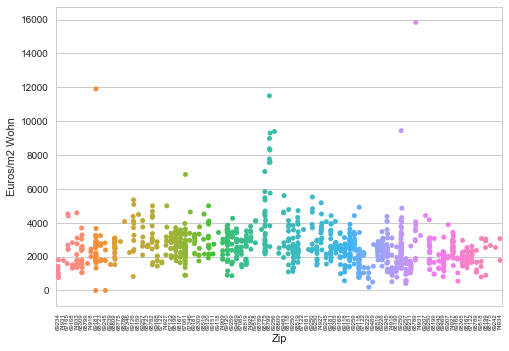

In [32]:
import matplotlib as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
myplot = sns.stripplot(x=df2.Zip, y=df2['Euros/m2 Wohn'], data=df2, jitter = True)
# change x label size
# show plot
myplot.set_xticklabels(df2.Zip, rotation=90, size=6)
sns.plt.show(myplot)
# make figure
fig = myplot.get_figure()
# save figure
fig.savefig("Zip_Price_per_liv_sqm.png", dpi = 300)

In [70]:
df.to_csv('170211.txt', sep='\t', index=False)